#Part I: Data Collection

Q1. Collect all the Reddit comments for the subreddit [r/Ex_Foster](https://www.reddit.com/r/Ex_Foster/) between 2019 and 2020.

Use the PSAW API to collect these data.

Fit all comments into a dataframe called df. 

[5 points]

In [1]:
#A1
!pip install psaw

In [16]:
import pandas as pd
import datetime as dt
import re
import gensim
from gensim import corpora
from collections import defaultdict
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords_english = stopwords.words('english')
display('here is a subset of the stop words')
display(stopwords_english[0:10])
import string
from psaw import PushshiftAPI
api = PushshiftAPI()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'here is a subset of the stop words'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [4]:
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    return next_month - datetime.timedelta(days=next_month.day)

import datetime
subredditlist = ['Ex_Foster']
for reddit in subredditlist:
   #collect data between 2019 and 2020
    for y in range(2019,2021):
      #collect data between January and December
      for i in range(1,13):
          file_name= str(reddit)+"_"+str(y)+"_"+str(i)+".json"
          print("starting with the month "+str(i))
          print("for subreddit..."+str(reddit))
          print("setting start epoch...")
          start_epoch=int(dt.datetime(y, i, 1).timestamp())
          print("setting end epoch...")
          last_day = last_day_of_month(datetime.date(y, i, 1))
          print("the last day of the month is...")
          print(last_day.day)
          last_day = int(last_day.day)
          end_epoch = int(dt.datetime(y,i,last_day).timestamp())
          print("setting up the generator...")
          gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit=reddit)
          print("setting up the dataframe...")
          df = pd.DataFrame([obj.d_ for obj in gen])
          print("The number of comments for year "+ str(y)+" and month "+str(i)+" is "+str(len(df.index)))
          df.to_json(file_name)

starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 1 is 0
starting with the month 2
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
28
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 2 is 0
starting with the month 3
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 3 is 69
starting with the month 4
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...


/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


The number of comments for year 2019 and month 4 is 233
starting with the month 5
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 5 is 119
starting with the month 6
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 6 is 183
starting with the month 7
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 7 is 78
starting with the month 8
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for ye

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 502
  warnings.warn("Got non 200 code %s" % response.status_code)
/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


The number of comments for year 2019 and month 9 is 229
starting with the month 10
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 10 is 351
starting with the month 11
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 11 is 388
starting with the month 12
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 12 is 326
starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments

In [5]:
df.tail()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created
131,[],None,IDidntShart,None,None,[],None,None,None,text,t2_s7fbz,False,False,[],"Listen, I can’t answer this for you. I have no...",None,None,1606788905,{},ge7u9gm,False,t3_k4b2ja,False,True,t3_k4b2ja,/r/Ex_Foster/comments/k4b2ja/aged_out_foster_k...,1606795338,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606789e+09
132,[],None,unspokenthoughtsxx89,None,None,[],None,None,None,text,t2_5b5wt8s8,False,False,[],Kk,None,None,1606787726,{},ge7s1sr,False,t3_k0jgks,False,True,t3_k0jgks,/r/Ex_Foster/comments/k0jgks/just_an_fyi_ill_b...,1606794155,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606788e+09
133,[],None,teacheroftroubles,None,None,[],None,None,None,text,t2_16xxn8,False,False,[],I am a ffy and a teacher - keep my contact I w...,None,None,1606786577,{},ge7pxm2,False,t3_j25l2c,False,True,t3_j25l2c,/r/Ex_Foster/comments/j25l2c/looking_for_volun...,1606793009,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606787e+09
134,[],None,teacheroftroubles,None,None,[],None,None,None,text,t2_16xxn8,False,False,[],"As kid who was respited it sucked strangers, s...",None,None,1606786484,{},ge7pr9k,False,t3_j6i603,False,False,t3_j6i603,/r/Ex_Foster/comments/j6i603/respite/ge7pr9k/,1606792915,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606786e+09
135,[],None,teacheroftroubles,None,None,[],None,None,None,text,t2_16xxn8,False,False,[],I want to say I got a package today - with a n...,None,None,1606786049,{},ge7oy0j,False,t3_k0jgks,False,True,t3_k0jgks,/r/Ex_Foster/comments/k0jgks/just_an_fyi_ill_b...,1606792478,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606786e+09


In [12]:
df_p = df.reset_index().groupby("link_id",as_index=False )['body'].apply(lambda x: ','.join(x))
p_threads = df_p.values
df = pd.DataFrame(p_threads)
df.rename(columns={0: "comment_thread", 1: "body"},inplace=True)
df

,comment_thread,body
0,t3_j25l2c,"Thank you!,I am a ffy and a teacher - keep my ..."
1,t3_j6i603,I loved both respite people I stayed with it w...
2,t3_j8ay2m,I was only in foster care from age 16-17 only ...
3,t3_k0jgks,I'm really happy to hear that things were ship...
4,t3_k3ih6a,"Oh no, I'm so sorry for your loss. I am going ..."
5,t3_k3kwte,"Honestly, I don't know. I'm not accustomed to ..."
6,t3_k4b2ja,You are right these are systemic barriers that...
7,t3_k50ay8,I was in a group home when I was first put int...
8,t3_k5bx2l,I'm proud of you!! Thats a great accomplishmen...
9,t3_k5o2t4,"As a teen I read adult books, murder and horro..."


#Part II: Data Cleaning

Q2. In the first pass, clean the text in body by removing the newline character code, the aperasand character code, non-breaking space and, and zero-width space. Call this new column "clean_text" [5 points]

In [13]:
#A2
def first_pass(text): 
    text = str(text)
    text = text.replace('\\n',' ')
    text = text.replace('&amp',' ')
    text = text.replace(';#x200B;',' ')
    text = text.replace('nbsp',' ')
    return text

df['clean_text'] = df.body.apply(first_pass)

Q3.In the second pass, tokenize, remove stopwords and punctuation as well as urls (web links). I also want you to use the nltk lemmatizer to lemmatize the body [5 points]

In [18]:
#A3
def second_pass(text): 
    #make string lowercase 
    text = str(text)
    text = text.lower()
    #remove links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #tokenize
    #create bag of words
    #1-grams 
    tokens = nltk.word_tokenize(text) 
    clean_text = []
    #remove stopwords, puncuation, then lemmatize
    for word in tokens:
        if (word not in stopwords_english and word not in string.punctuation): 
            token = wordnet_lemmatizer.lemmatize(word)
            clean_text.append(token)         
    #remove words of length 3 or smaller        
    clean_text = [token for token in clean_text if len(token) > 3]  
    return clean_text

df['clean_text'] = df.body.apply(second_pass)

In [20]:
#Now that we have the cleaned text for each thread
#documents, or docs represents each thread
docs = df.clean_text.values

##PartIII:Creating the model

Q4. Using the documents, train a word2vec model using CBOW, with size=300. Each word should be repeated at least 5 times in the corpus to include it in the model. The window for the model should be 5. Use 6 cores (workers) for the analysis. Call your word2vec model model. 

[20 points]


In [22]:
#A4
from gensim.models import Word2Vec
model = Word2Vec(docs, min_count=5, size=300, workers=6, window=5)

Q5.What are the closest 5 words to the word "foster"?


 [5 points]




In [26]:
#A5
model.most_similar('foster', topn=5)

[('like', 0.8584215641021729),
 ('people', 0.840106725692749),
 ('would', 0.8366782665252686),
 ('thing', 0.8352704048156738),
 ('could', 0.8205769062042236)]

Q6. Graph the closest words to "foster" [5 points]


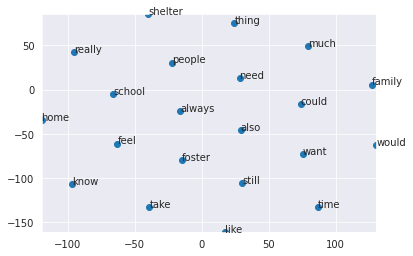

In [31]:
#A6
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word):
  arr = np.empty((0,300), dtype='f')
  word_labels = [word]
  close_words = model.similar_by_word(word, topn=20)
  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model[wrd_score[0]]
    word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
  tsne = TSNE(n_components=2)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)
  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)
  for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
  plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
  plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
  plt.show()

display_closestwords_tsnescatterplot(model, 'foster')

Q7. How similar (close) are the words "foster" and "parent"? [5 points]

In [27]:
#A7
model.similarity("foster", "parent")

0.77710605

Q8. Which of the terms "parent", "shop", and "school" do not fit? Use the doesnt_match feature here [5 points]

In [28]:
#A8
model.doesnt_match(['parent', 'shop', 'school'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'school'

Q9. Create a new dataframe, call it result. Result should include every word in the word2vec model you created and the 300 features that represent it in multi-dimensional space [20 points]

In [39]:
#A9
all_vocab = list(model.wv.vocab.keys())
data_dict = {word: model[word] for word in all_vocab}
result = pd.DataFrame(data=data_dict).transpose()

Q10.Using result.values, get the matrix that represents all the words in the model. Call this matrix X.

Now, using t-SNE, reduce the dimensionality from 300 to 2. 

[10 points]

In [42]:
#A10.
X = result.values
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne_df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
X_tsne_df.head()

,x,y
thank,1.186208,-0.247602
keep,-2.639838,1.972862
would,-0.492570,13.042006
love,3.907838,-3.622074
someone,-0.429239,7.533641


##Part III: Visualizing a word2vec model

Q11. Create a new word2vec model just as you did in Q4. In this case though, only include words that appear more than 15 times in our vocabulary. Call this model "small model" [5 points]


In [52]:
#A11.
small_model = Word2Vec(docs, min_count=15, size=300, workers=6, window=5)

Q12. Using t-SNE, reduce dimensionality to 2 dimensions and visualize them

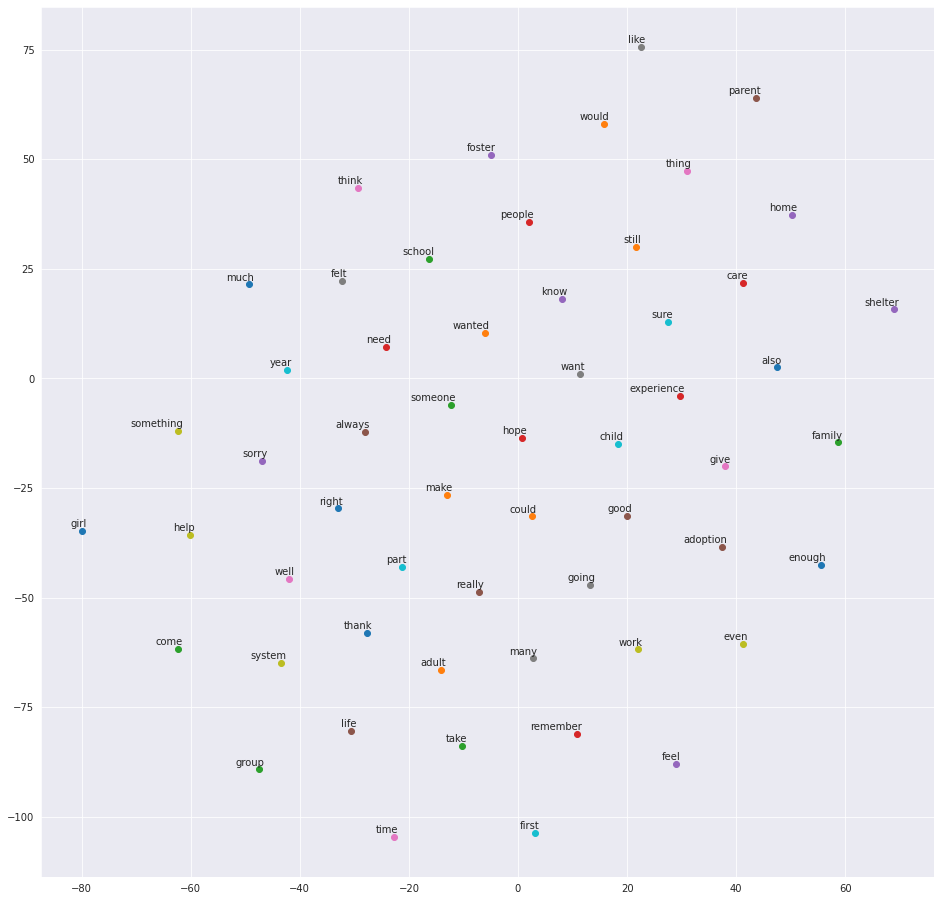

In [53]:
#A12
def tsne_plot(model):
  labels = []
  tokens = []
  for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)
  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(tokens)
  x = []
  y = []
  for value in new_values:
    x.append(value[0])
    y.append(value[1])
  plt.figure(figsize=(16,16))
  for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

tsne_plot(small_model)